## Online Demographics Data 

In [1]:
import pandas as pd
import ptitprince as pt
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.stats import pearsonr

ModuleNotFoundError: No module named 'ptitprince'

In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

In [3]:
%run functions_online_demographics.ipynb

In [4]:
os.chdir("../../")

In [5]:
# Checks current directory
cwd = os.getcwd() 
print("Current working directory is:", cwd) 

Current working directory is: C:\Users\katya\MPI4


##### Loading the data  

In [6]:
#Loading the data for session 1

session1 = pd.read_csv('data/session1/clean_dataset.csv')
session1 = session1.set_index('PROLIFICID')

#Loading the data for session 8

session8 = pd.read_csv('data/session8/clean_dataset.csv')
session8 = session8.set_index('PROLIFICID')

#Loading the data for session 15

session15 = pd.read_csv('data/session15/clean_dataset.csv')
session15 = session15.set_index('PROLIFICID')


dec = 3

### Session1  

In [7]:
session = session1

##### Overall Distribution

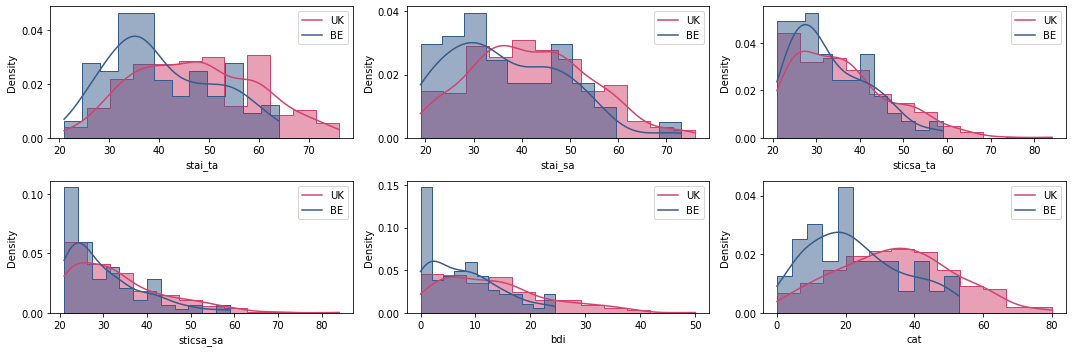

In [8]:
ivs = ["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]

plt.subplots(figsize=(15,5))

for i in enumerate(ivs): 
    plt.subplot(2,3, i[0]+1)
    sns.histplot(session[i[1]][session['GROUP'] == 'UK'], bins = 12,stat='density', kde=True, element="step", color = sns.color_palette("magma")[3])
    sns.histplot(session[i[1]][session['GROUP'] == 'BE'], bins = 12,stat='density', kde=True, element="step", color = sns.color_palette("viridis")[1])
    plt.legend(['UK', 'BE'])

    plt.tight_layout()

mpl.rcParams['font.size'] = 14

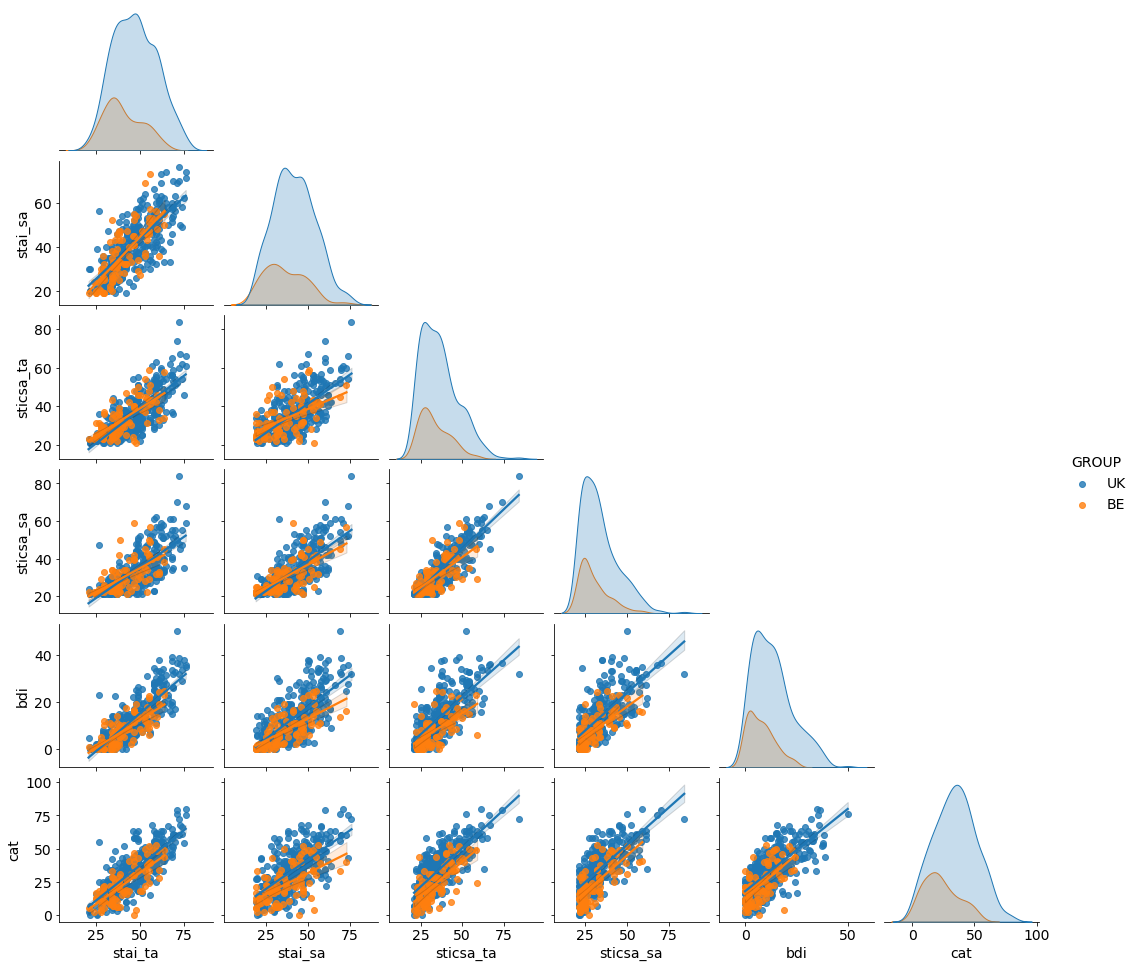

In [9]:
sdf = session1.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat", 'GROUP']]
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg", hue = 'GROUP')
plt.subplots_adjust(top=0.9)

In [10]:
df = session1.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]]

In [11]:
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

stai_ta   stai_sa sticsa_ta sticsa_sa       bdi       cat
stai_ta      1.0***   0.75***  0.756***  0.722***  0.813***  0.778***
stai_sa     0.75***    1.0***   0.64***  0.719***  0.692***  0.643***
sticsa_ta  0.756***   0.64***    1.0***  0.841***  0.711***  0.752***
sticsa_sa  0.722***  0.719***  0.841***    1.0***  0.716***  0.726***
bdi        0.813***  0.692***  0.711***  0.716***    1.0***  0.723***
cat        0.778***  0.643***  0.752***  0.726***  0.723***    1.0***

<AxesSubplot:>

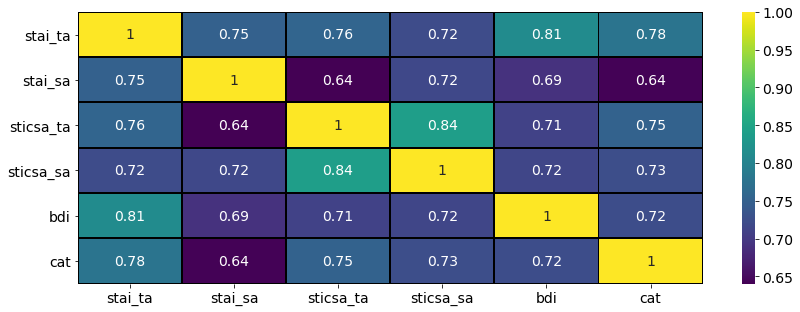

In [12]:
mpl.rcParams['figure.figsize'] = 14,5
mpl.rcParams['font.size'] = 14
sns.heatmap(rho, cmap = 'viridis', linecolor = 'black', linewidth = 1, annot = True)

##### Summary Table

In [13]:
summary_table(session, 2, dec, 'session1_online_demographics')

Berlin                          \
                                                Male                  Female   
                                                   M         %     SD      M   
Gender Ratio                                          36.36 %                  
Age                                            26.90             3.96  26.50   
Trait Anxiety(STAIT)                           36.59             9.94  42.30   
State Anxiety(STAIS)                           32.00            11.14  38.36   
Trait Cognitive and Somatic Anxiety (STICSAT)  29.72             6.24  35.45   
State Cognitive and Somatic Anxiety (STICSAS)  27.09             7.23  31.68   
Beck Depression Inventory(BDI)                  5.58             5.58   8.70   
Catastrophizing                                17.62            10.70  25.38   

                                                                         UK  \
                                                                       Male   
                                                     %     SD      P      M   
Gender Ratio                                   63.64 %                        
Age                                                      4.96  0.698  28.42   
Trait Anxiety(STAIT)                                    10.11  0.012  45.75   
State Anxiety(STAIS)                                    12.02  0.016  39.06   
Trait Cognitive and Somatic Anxiety (STICSAT)            9.81  0.004  34.01   
State Cognitive and Somatic Anxiety (STICSAS)            9.04  0.016  32.12   
Beck Depression Inventory(BDI)                           6.50  0.025  12.25   
Catastrophizing                                         14.47  0.010  31.33   

                                                                               \
                                                              Female            
                                                     %     SD      M        %   
Gender Ratio                                   39.29 %                60.71 %   
Age                                                      6.38  27.54            
Trait Anxiety(STAIT)                                    12.57  48.21            
State Anxiety(STAIS)                                    11.89  43.81            
Trait Cognitive and Somatic Anxiety (STICSAT)           10.89  37.66            
State Cognitive and Somatic Anxiety (STICSAS)           10.51  34.30            
Beck Depression Inventory(BDI)                           9.99  14.03            
Catastrophizing                                         16.94  36.40            

                                                                    
                                                                 P  
                                                  SD      P         
Gender Ratio                                                        
Age                                             6.01  0.223  0.087  
Trait Anxiety(STAIT)                           11.87  0.084  0.000  
State Anxiety(STAIS)                           12.18  0.001  0.000  
Trait Cognitive and Somatic Anxiety (STICSAT)  11.30  0.005  0.024  
State Cognitive and Somatic Anxiety (STICSAS)  11.12  0.088  0.006  
Beck Depression Inventory(BDI)                  9.57  0.117  0.000  
Catastrophizing                                16.55  0.010  0.000

### Session8


In [14]:
session = session8

##### Overall Distribution

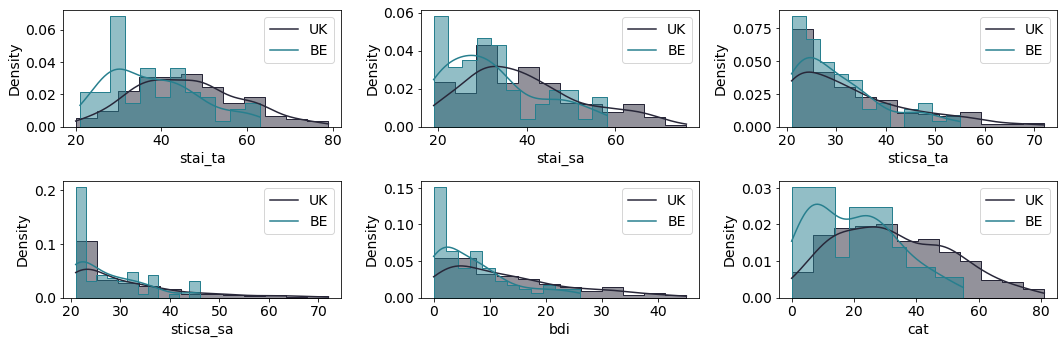

In [15]:
ivs = ["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]

plt.subplots(figsize=(15,5))

for i in enumerate(ivs): 
    plt.subplot(2,3, i[0]+1)
    sns.histplot(session[i[1]][session['GROUP'] == 'UK'], bins = 12,stat='density', kde=True, element="step", color=sns.color_palette("icefire")[2])
    sns.histplot(session[i[1]][session['GROUP'] == 'BE'], bins = 12,stat='density', kde=True, element="step", color=sns.color_palette("viridis")[2])
    plt.legend(['UK', 'BE'])

    plt.tight_layout()

##### Cross correlations and distributions

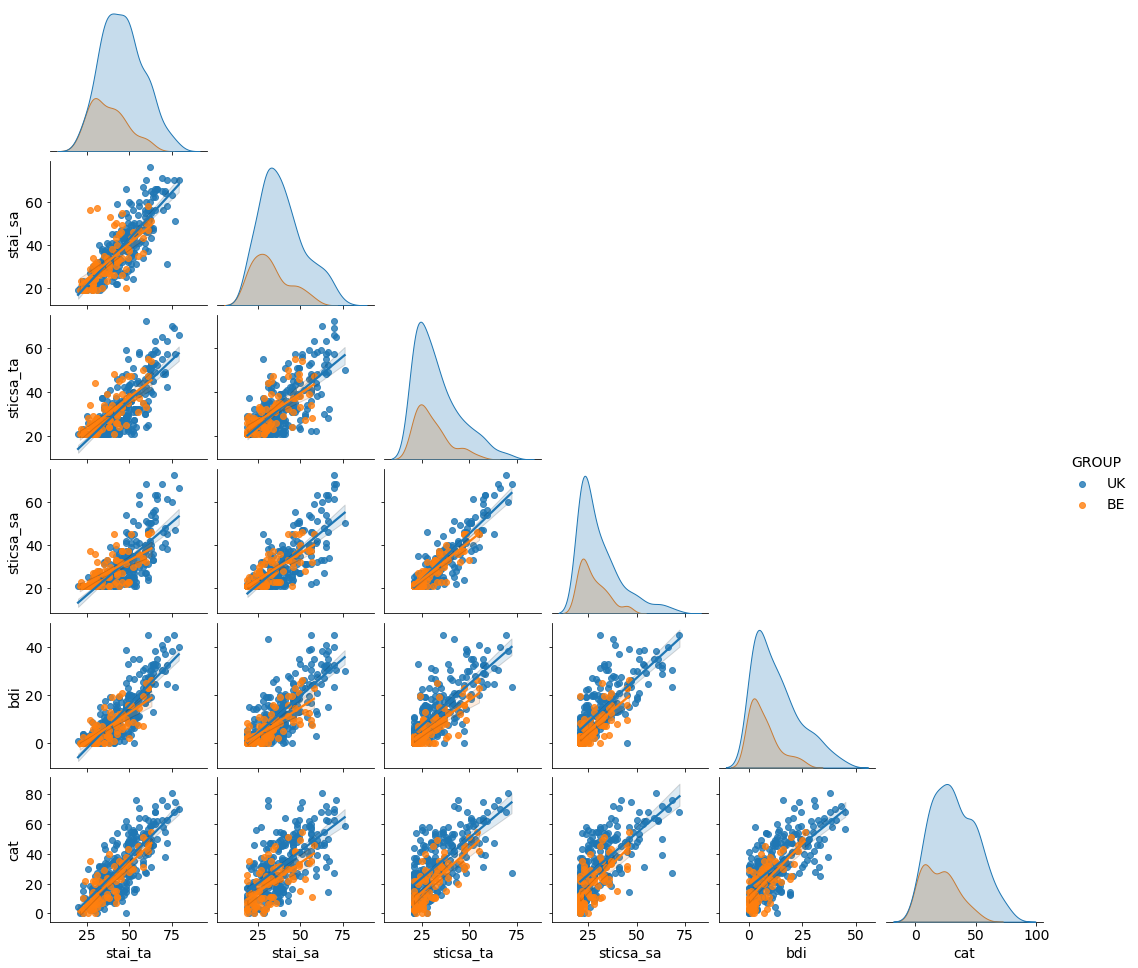

In [16]:
sdf = session8.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat", 'GROUP']]
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg", hue = 'GROUP')
plt.subplots_adjust(top=0.9)

In [17]:
df = session8.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]]

In [18]:
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

stai_ta   stai_sa sticsa_ta sticsa_sa       bdi       cat
stai_ta      1.0***  0.799***  0.757***  0.725***  0.822***  0.797***
stai_sa    0.799***    1.0***    0.7***   0.76***  0.756***  0.642***
sticsa_ta  0.757***    0.7***    1.0***  0.893***  0.751***  0.696***
sticsa_sa  0.725***   0.76***  0.893***    1.0***  0.764***  0.685***
bdi        0.822***  0.756***  0.751***  0.764***    1.0***  0.709***
cat        0.797***  0.642***  0.696***  0.685***  0.709***    1.0***

<AxesSubplot:>

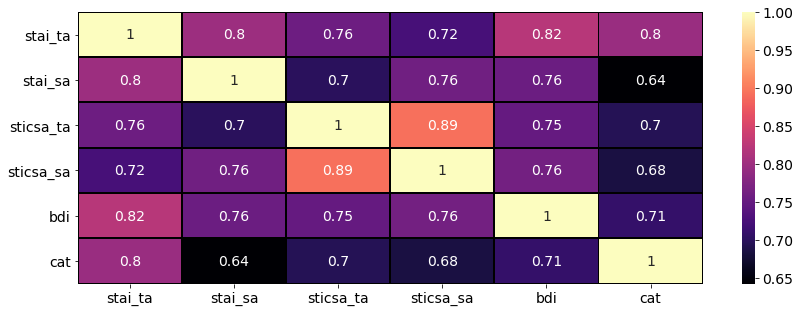

In [19]:
mpl.rcParams['figure.figsize'] = 14,5
mpl.rcParams['font.size'] = 14
sns.heatmap(rho, cmap = 'magma', linecolor = 'black', linewidth = 1, annot = True)

##### Summary Table

In [20]:
summary_table(session, 2, dec, 'session8_online_demographics')

Berlin                          \
                                                Male                  Female   
                                                   M         %     SD      M   
Gender Ratio                                          29.87 %                  
Age                                            27.35             3.86  27.15   
Trait Anxiety(STAIT)                           32.74             9.39  39.98   
State Anxiety(STAIS)                           26.91             6.24  34.94   
Trait Cognitive and Somatic Anxiety (STICSAT)  25.61             5.87  32.35   
State Cognitive and Somatic Anxiety (STICSAS)  24.00             4.03  29.33   
Beck Depression Inventory(BDI)                  3.30             3.70   8.37   
Catastrophizing                                12.83            10.14  23.15   

                                                                         UK  \
                                                                       Male   
                                                     %     SD      P      M   
Gender Ratio                                   70.13 %                        
Age                                                      5.40  0.875  29.27   
Trait Anxiety(STAIT)                                    10.46  0.005  43.61   
State Anxiety(STAIS)                                    11.59  0.002  37.82   
Trait Cognitive and Somatic Anxiety (STICSAT)            8.94  0.001  31.28   
State Cognitive and Somatic Anxiety (STICSAS)            7.50  0.002  29.65   
Beck Depression Inventory(BDI)                           7.26  0.002  11.92   
Catastrophizing                                         14.32  0.002  29.07   

                                                                               \
                                                              Female            
                                                     %     SD      M        %   
Gender Ratio                                   40.08 %                59.92 %   
Age                                                      6.05  28.47            
Trait Anxiety(STAIT)                                    11.65  47.39            
State Anxiety(STAIS)                                    12.65  40.17            
Trait Cognitive and Somatic Anxiety (STICSAT)           11.00  34.21            
State Cognitive and Somatic Anxiety (STICSAS)           10.78  31.51            
Beck Depression Inventory(BDI)                          10.54  13.45            
Catastrophizing                                         17.24  34.46            

                                                                    
                                                                 P  
                                                  SD      P         
Gender Ratio                                                        
Age                                             6.06  0.306  0.070  
Trait Anxiety(STAIT)                           12.54  0.018  0.000  
State Anxiety(STAIS)                           13.25  0.166  0.000  
Trait Cognitive and Somatic Anxiety (STICSAT)  12.10  0.055  0.046  
State Cognitive and Somatic Anxiety (STICSAS)  11.45  0.204  0.015  
Beck Depression Inventory(BDI)                 10.98  0.278  0.000  
Catastrophizing                                18.76  0.024  0.000

### Session15

##### Overall Distribution

In [21]:
session = session15

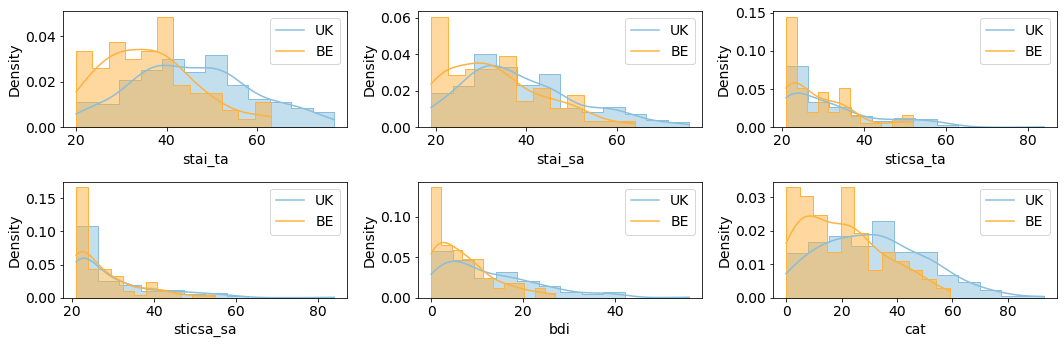

In [22]:
ivs = ["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]

plt.subplots(figsize=(15,5))

for i in enumerate(ivs): 
    plt.subplot(2,3, i[0]+1)
    sns.histplot(session[i[1]][session['GROUP'] == 'UK'], bins = 12,stat='density', kde=True, element="step", color=sns.color_palette("Blues")[2])
    sns.histplot(session[i[1]][session['GROUP'] == 'BE'], bins = 12,stat='density', kde=True, element="step", color=sns.color_palette("YlOrBr")[2])
    plt.legend(['UK', 'BE'])

    plt.tight_layout()

##### Cross correlations and distributions

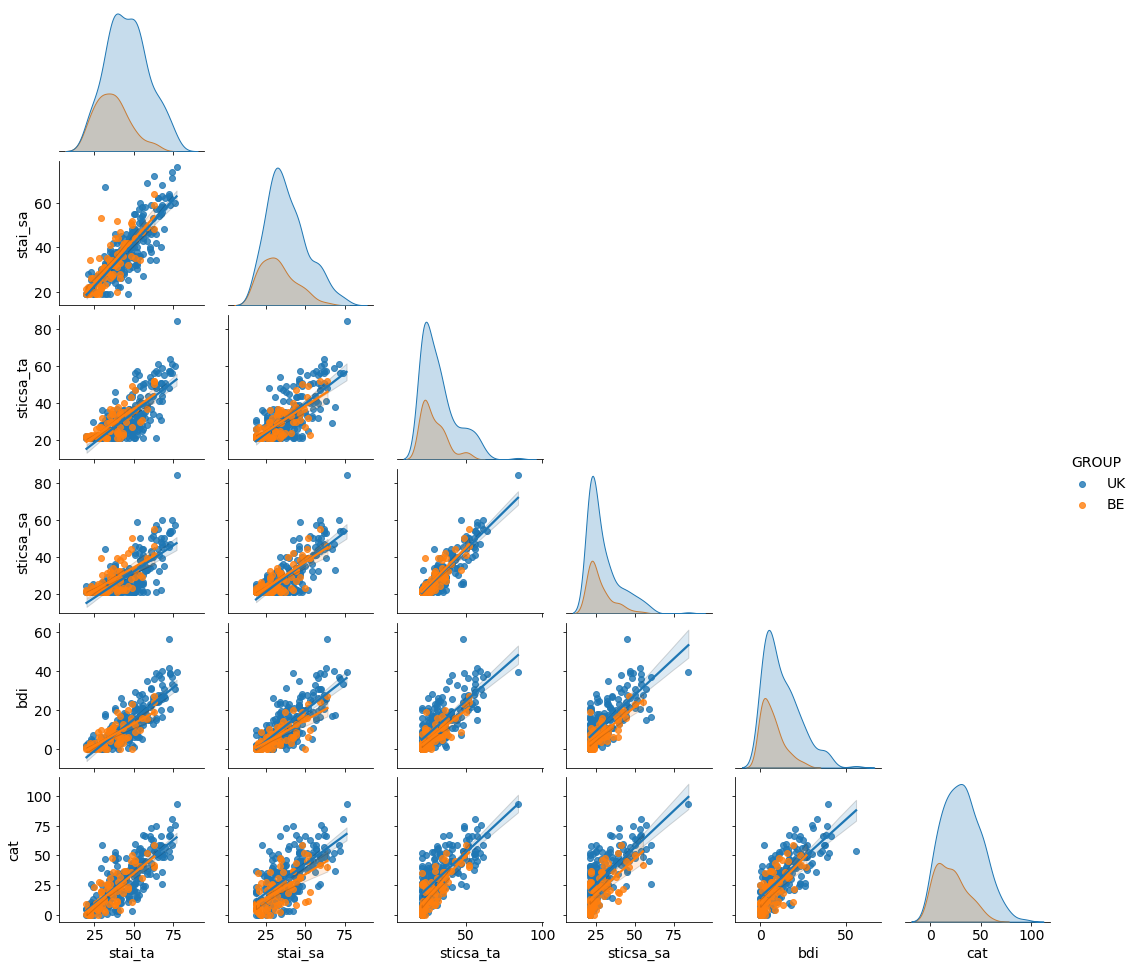

In [23]:
sdf = session15.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat", 'GROUP']]
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg", hue = 'GROUP')
plt.subplots_adjust(top=0.9)

In [24]:
df = session.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]]

In [25]:
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

stai_ta   stai_sa sticsa_ta sticsa_sa       bdi       cat
stai_ta      1.0***  0.815***  0.747***  0.693***  0.809***  0.781***
stai_sa    0.815***    1.0***  0.719***  0.771***  0.762***  0.663***
sticsa_ta  0.747***  0.719***    1.0***  0.893***   0.76***  0.747***
sticsa_sa  0.693***  0.771***  0.893***    1.0***  0.748***   0.69***
bdi        0.809***  0.762***   0.76***  0.748***    1.0***  0.736***
cat        0.781***  0.663***  0.747***   0.69***  0.736***    1.0***

<AxesSubplot:>

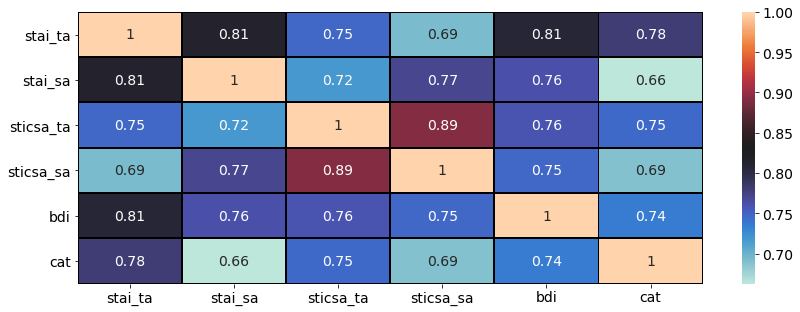

In [26]:
mpl.rcParams['figure.figsize'] = 14,5
mpl.rcParams['font.size'] = 14
sns.heatmap(rho, cmap = 'icefire', linecolor = 'black', linewidth = 1, annot = True)

##### Summary Table

In [27]:
summary_table(session, 2, dec, 'session15_online_demographics')

Berlin                          \
                                                Male                  Female   
                                                   M         %     SD      M   
Gender Ratio                                          32.88 %                  
Age                                            27.50             4.02  27.37   
Trait Anxiety(STAIT)                           31.83             9.23  38.22   
State Anxiety(STAIS)                           27.50             8.76  35.39   
Trait Cognitive and Somatic Anxiety (STICSAT)  25.67             6.87  30.33   
State Cognitive and Somatic Anxiety (STICSAS)  24.21             5.29  29.08   
Beck Depression Inventory(BDI)                  4.56             5.24   8.12   
Catastrophizing                                12.92            12.22  23.25   

                                                                         UK  \
                                                                       Male   
                                                     %     SD      P      M   
Gender Ratio                                   67.12 %                        
Age                                                      5.23  0.913  30.10   
Trait Anxiety(STAIT)                                    10.89  0.016  43.55   
State Anxiety(STAIS)                                    10.86  0.003  37.10   
Trait Cognitive and Somatic Anxiety (STICSAT)            8.41  0.021  30.41   
State Cognitive and Somatic Anxiety (STICSAS)            8.54  0.013  28.52   
Beck Depression Inventory(BDI)                           6.81  0.027  10.82   
Catastrophizing                                         15.05  0.005  26.52   

                                                                               \
                                                              Female            
                                                     %     SD      M        %   
Gender Ratio                                   43.12 %                56.88 %   
Age                                                      5.96  29.42            
Trait Anxiety(STAIT)                                    12.78  47.55            
State Anxiety(STAIS)                                    12.04  39.66            
Trait Cognitive and Somatic Anxiety (STICSAT)           11.32  33.63            
State Cognitive and Somatic Anxiety (STICSAS)           10.44  30.19            
Beck Depression Inventory(BDI)                          10.01  13.71            
Catastrophizing                                         16.97  34.69            

                                                                    
                                                                 P  
                                                  SD      P         
Gender Ratio                                                        
Age                                             5.90  0.405  0.005  
Trait Anxiety(STAIT)                           13.27  0.026  0.000  
State Anxiety(STAIS)                           12.94  0.137  0.000  
Trait Cognitive and Somatic Anxiety (STICSAT)  11.71  0.043  0.015  
State Cognitive and Somatic Anxiety (STICSAS)  10.60  0.249  0.100  
Beck Depression Inventory(BDI)                 10.97  0.047  0.000  
Catastrophizing                                18.96  0.001  0.000

#### Pooled Trait Measures 

In [28]:
pooled_data = [session1, session8, session15]
pooled = pd.concat(pooled_data, axis = 1, keys ='PROLIFICID' )
pooled['STAI_TA_Pooled'] = round((pooled['R']['stai_ta'] + pooled['O']['stai_ta'] + pooled['P']['stai_ta'])/3, dec)
pooled_final = pooled['STAI_TA_Pooled'].to_frame()
pooled_final.columns = ['stai_ta']
pooled_final['stai_sa'] = round((pooled['R']['stai_sa'] + pooled['O']['stai_sa'] + pooled['P']['stai_sa'])/3, dec)
pooled_final['sticsa_ta'] = round((pooled['R']['sticsa_ta'] + pooled['O']['sticsa_ta'] + pooled['P']['sticsa_ta'])/3, dec)
pooled_final['sticsa_sa'] = round((pooled['R']['sticsa_sa'] + pooled['O']['sticsa_sa'] + pooled['P']['sticsa_sa'])/3, dec)
pooled_final['bdi'] = round((pooled['R']['bdi'] + pooled['O']['bdi'] + pooled['P']['bdi'])/3, dec)
pooled_final['cat'] = round((pooled['R']['cat'] + pooled['O']['cat'] + pooled['P']['cat'])/3, dec)
pooled_final['GROUP'] = pooled['R']['GROUP']
pooled_final['sr_gender'] = pooled['R']['sr_gender']
pooled_final['sr_age'] = pooled['R']['sr_age']

pooled_trait_measures = pooled_final
pooled_trait_measures.to_csv('data/pooled_trait_measures.csv')

In [29]:
pooled_trait_measures

stai_ta  stai_sa  sticsa_ta  sticsa_sa     bdi  \
PROLIFICID                                                                 
55d06fd334e9060012e5781c   52.000   32.000     25.667     23.667   7.667   
563e35190980220011572d9a   38.000   36.333     28.667     29.667  11.667   
566ff4a3b937e400052d3489   40.333   33.000     27.333     26.000   7.000   
56ca0400b30699000bd9d94f   34.333   30.000     22.333     21.000   0.667   
57754d57ca706f000190eaf1   27.000   26.000     21.333     21.000   1.167   
...                           ...      ...        ...        ...     ...   
5eaacef236ec6b041345259d   26.333   22.667     25.333     22.333   0.500   
5eaada6083d005077a328671   20.667   19.667     21.667     21.333   0.667   
5eaafa4b9f58200867cb6cc8   28.333   25.333     27.333     23.333   1.833   
5eab06d913f83a097f9c252e   27.667   21.333     22.333     22.333   1.167   
5eab262cef271f0e2a7e0075   48.000   42.000     43.667     48.667  17.167   

                             cat GROUP sr_gender  sr_age  
PROLIFICID                                                
55d06fd334e9060012e5781c  27.000    UK         F    32.0  
563e35190980220011572d9a  38.333    UK         F    26.0  
566ff4a3b937e400052d3489  17.000    UK         F    37.0  
56ca0400b30699000bd9d94f  15.333    UK         F    39.0  
57754d57ca706f000190eaf1  10.333    UK         M    35.0  
...                          ...   ...       ...     ...  
5eaacef236ec6b041345259d   3.667    BE         F    27.0  
5eaada6083d005077a328671   2.667    BE         F    29.0  
5eaafa4b9f58200867cb6cc8   9.667    BE         F    28.0  
5eab06d913f83a097f9c252e  11.667    BE         M    22.0  
5eab262cef271f0e2a7e0075  31.000    BE         F    20.0  

[402 rows x 9 columns]

##### Overall Distribution

In [30]:
session = pooled_trait_measures

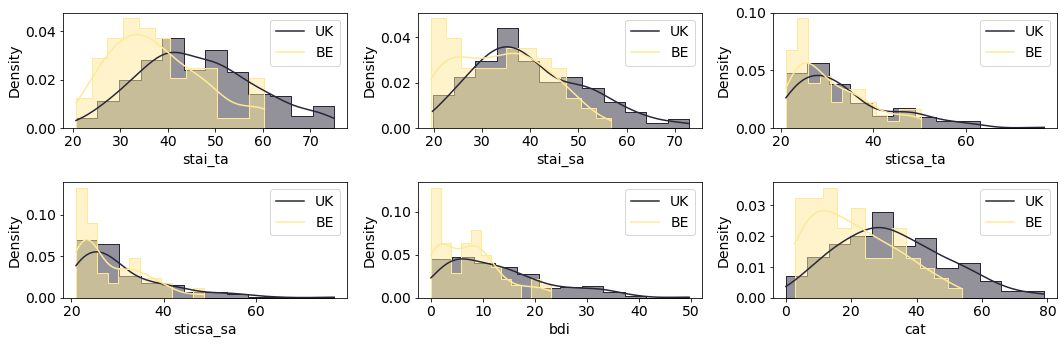

In [31]:
ivs = ["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]

plt.subplots(figsize=(15,5))

for i in enumerate(ivs): 
    plt.subplot(2,3, i[0]+1)
    sns.histplot(session[i[1]][session['GROUP'] == 'UK'], bins = 12,stat='density', kde=True, element="step", color=sns.color_palette("icefire")[2])
    sns.histplot(session[i[1]][session['GROUP'] == 'BE'], bins = 12,stat='density', kde=True, element="step", color=sns.color_palette("Spectral")[2])
    plt.legend(['UK', 'BE'])

    plt.tight_layout()

##### Cross correlations and distributions

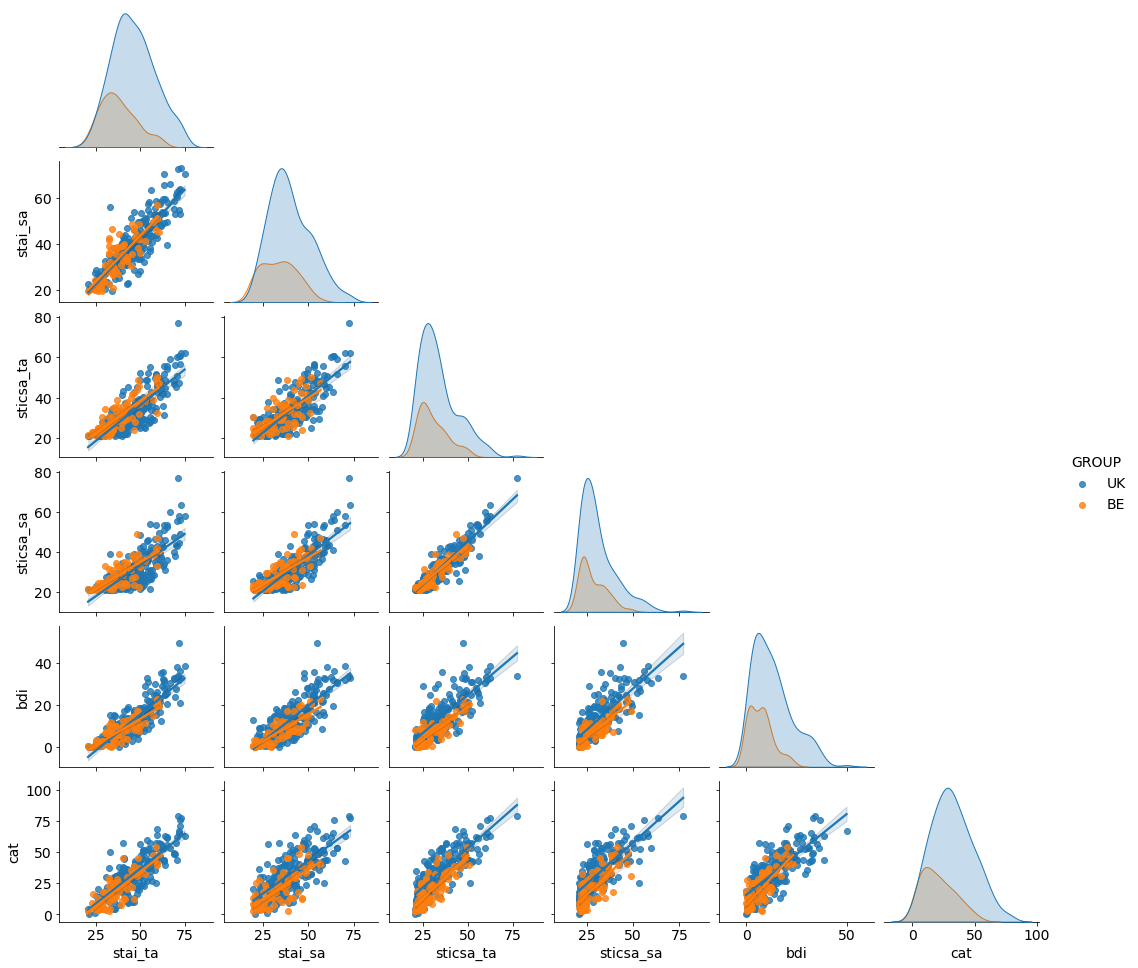

In [32]:
sdf = pooled_trait_measures.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat", 'GROUP']]
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg", hue = 'GROUP')
plt.subplots_adjust(top=0.9)

In [33]:
df = pooled_trait_measures.loc[:,["stai_ta", "stai_sa", "sticsa_ta", "sticsa_sa", "bdi", "cat"]]

In [34]:
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

stai_ta   stai_sa sticsa_ta sticsa_sa       bdi       cat
stai_ta      1.0***  0.858***  0.796***  0.758***   0.86***  0.835***
stai_sa    0.858***    1.0***  0.777***  0.817***   0.81***  0.742***
sticsa_ta  0.796***  0.777***    1.0***  0.923***  0.795***  0.804***
sticsa_sa  0.758***  0.817***  0.923***    1.0***  0.792***  0.768***
bdi         0.86***   0.81***  0.795***  0.792***    1.0***  0.782***
cat        0.835***  0.742***  0.804***  0.768***  0.782***    1.0***

<AxesSubplot:>

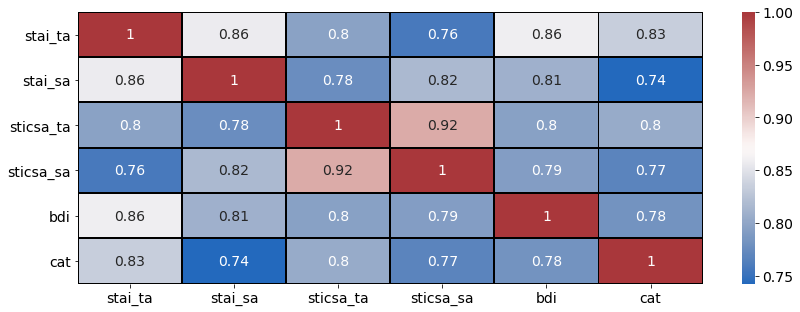

In [35]:
mpl.rcParams['figure.figsize'] = 14,5
mpl.rcParams['font.size'] = 14
sns.heatmap(rho, cmap = 'vlag', linecolor = 'black', linewidth = 1, annot = True)

##### Summary Table

In [36]:
summary_table(session, 2, dec, 'pooled_trait_measures_summary_table')

Berlin                         \
                                                Male                 Female   
                                                   M         %    SD      M   
Gender Ratio                                          29.87 %                 
Age                                            27.35            3.86  27.15   
Trait Anxiety(STAIT)                           32.97            8.55  39.86   
State Anxiety(STAIS)                           28.38            7.99  36.12   
Trait Cognitive and Somatic Anxiety (STICSAT)  27.02            5.93  32.61   
State Cognitive and Somatic Anxiety (STICSAS)  24.80            4.19  30.34   
Beck Depression Inventory(BDI)                  4.27            4.27   8.72   
Catastrophizing                                14.11            9.11  23.81   

                                                                         UK  \
                                                                       Male   
                                                     %     SD      P      M   
Gender Ratio                                   70.13 %                        
Age                                                      5.40  0.875  29.27   
Trait Anxiety(STAIT)                                     9.87  0.006  44.19   
State Anxiety(STAIS)                                     9.30  0.001  38.22   
Trait Cognitive and Somatic Anxiety (STICSAT)            8.00  0.005  31.86   
State Cognitive and Somatic Anxiety (STICSAS)            7.17  0.001  30.12   
Beck Depression Inventory(BDI)                           6.09  0.003  11.88   
Catastrophizing                                         13.58  0.003  28.79   

                                                                               \
                                                              Female            
                                                     %     SD      M        %   
Gender Ratio                                   40.08 %                59.92 %   
Age                                                      6.05  28.47            
Trait Anxiety(STAIT)                                    11.79  47.58            
State Anxiety(STAIS)                                    11.40  41.20            
Trait Cognitive and Somatic Anxiety (STICSAT)           10.33  34.94            
State Cognitive and Somatic Anxiety (STICSAS)            9.98  31.51            
Beck Depression Inventory(BDI)                           9.79  13.66            
Catastrophizing                                         15.35  34.86            

                                                                    
                                                                 P  
                                                  SD      P         
Gender Ratio                                                        
Age                                             6.06  0.306  0.070  
Trait Anxiety(STAIT)                           11.89  0.038  0.000  
State Anxiety(STAIS)                           11.39  0.059  0.000  
Trait Cognitive and Somatic Anxiety (STICSAT)  10.47  0.033  0.026  
State Cognitive and Somatic Anxiety (STICSAS)   9.48  0.299  0.035  
Beck Depression Inventory(BDI)                  9.72  0.185  0.000  
Catastrophizing                                16.74  0.007  0.000